# Traitement de données Léonard

Léonard est né le 15 octobre 1990 dans une famille parisienne. Sa mère, écrivain, lui raconte souvent des histoires dans lesquelles il est le héros et son père, producteur et réalisateur, le filme régulièrement. Léonard est un petit garçon vif et imaginatif dont le développement langagier peut être qualifié d’assez rapide. Il était enfant unique et âgé de 1;08 lors des premiers enregistrements et Aliyah Morgenstern l’a filmé chez lui une heure par mois jusqu’à ses 3;03 composant ainsi un corpus longitudinal en situation naturelle.

## Nettoyage


Récupèrer la liste des noms de fichier pour Madeleine :

- Ces fichiers sont placés dans un repertoire 'data/madeleine_texte'
- Ils sont issuent d'une extraction sur le site colaje au format chat
- Nous les avons transformés en format .txt afin de pouvoir les traiter avec python

In [1]:
import os 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import chardet

In [67]:
#print(os.getcwd())
#os.chdir('/Users/sariakarandrianjanahary/Desktop/M1_MIASHS/TER/fichiecsv')
#listing=os.listdir()

In [68]:
#listing.sort()
#listing

In [4]:
del listing[0] # pour retirer '.DS_Store'
#len(listing)

14

Nous avons 15 fichiers pour Madeleine, chacun de ses fichiers corresepondent aux retrancriptions d'un enregistrement vidéo.



 ## Lecture des données

- Définir le nom des colonnes selon le fichier final attendu
- Lire chaque fichier de la liste
- Ajouter les colonnes nom de l'enfant et son age
- La colonne age identifie de manière unique l'enregistrement

In [5]:
os.chdir('/Users/sariakarandrianjanahary/Desktop/M1_MIASHS/TER/fichiecsv')
d = {} # Le dictionnaire contenant les noms des fichiers
nom_col = ['type', 'seconde_debut', 'seconde_fin', 'contenu']
rows = 0 #Compteur de ligne pour vérifier la perte de données

for file in listing: 
    d[file]=pd.read_csv(file, 
                        sep = '\t', 
                        names = nom_col, 
                        header = None)  

    # On ajoute le nom de l'enfant
    nom_pos1 = 0
    nom_pos2 = file.find('-')
    nom = file[nom_pos1:nom_pos2]
    d[file]['enfant'] = nom
    
    # On ajoute l'age de l'enfant
    age_pos1 = file.find('_')-1
    age_pos2 = file.find('.')
    age = file[age_pos1:age_pos2]
    d[file]['age'] = age
    
    rows += len(d[file])
    
    
# DataFrame contenant toutes les lignes de l'enfant
data = pd.concat([d[file] for file in listing], 
                 sort=False,
                 ignore_index=True)

In [69]:
#data.shape

## Vérification de la perte de données


On vérifie qu'il y a autant de ligne lu (variable rows) que de ligne écritent (len(data))

In [7]:
print(rows == len(data))

True


## Ordre des colonnes

In [8]:
data=data[['enfant', 'age','type', 'seconde_debut', 'seconde_fin', 'contenu']]
data.head()

,enfant,age,type,seconde_debut,seconde_fin,contenu
0,LEONARD,1_08_09,+div+,0.0,1967.815,Situation
1,LEONARD,1_08_09,+div+,0.0,787.467,BG
2,LEONARD,1_08_09,CHI,0.0,2.456,oh !
3,LEONARD,1_08_09,mod,NaN,NaN,ɔ
4,LEONARD,1_08_09,pho,NaN,NaN,oː


## Création  fichier final csv

In [9]:
# Création du fichier enfant
os.chdir('/Users/sariakarandrianjanahary/Desktop/M1_MIASHS/TER')
data.to_csv('data_leonard_final.csv',
           encoding = 'utf-8',
           sep = '\t',
           header = True)


On peut maintenant utiliser le fichier 'data_leonard_finale.csv' pour l'exploration de données.

## Lecture fichier final

In [5]:
data_leonard = pd.read_csv('..\data\data_leonard_final.csv',
                           sep = '\t',
                           encoding = 'utf-8',
                           index_col=False)

# On supprime la colonne qui duplique les index
data_leonard = data_leonard.drop(columns = 'Unnamed: 0')

Dimension :

In [6]:
# dimension de notre données
data_leonard.shape

(28746, 6)

## Exploration des données

Qu'elles sont les différents type de ligne ?

In [7]:
print(len(data_leonard['type'].unique()))

25


In [10]:
data_leonard['type'].unique()

array(['+div+', 'CHI', 'mod', 'pho', 'MOT', 'sit', 'int', 'OBS', 'tim',
       'FAT', '-div-', 'PAT', 'com', 'FLO', 'ELS', 'ADX', 'act', 'nof',
       'xpnt', 'GTA', 'ARI', 'GUI', 'MIN', 'GRM', 'MAN'], dtype=object)

## Le phonèmes


Les lignes de type 'pho' correspondent à la traduction phonétique lorsque Leonard s'exprime :

- Nous avons à disposition 3852 traductions pour Leonard
- Les traductions s'arrêtent à l'age de 3 ans 2 mois et 25 jours

In [9]:
pho_leonard = data_leonard[data_leonard['type'] == 'pho']
pho_leonard.head(10)

,enfant,age,type,seconde_debut,seconde_fin,contenu
4,LEONARD,1_08_09,pho,NaN,NaN,oː
10,LEONARD,1_08_09,pho,NaN,NaN,kɔkɔ
14,LEONARD,1_08_09,pho,NaN,NaN,kɔkɔ
18,LEONARD,1_08_09,pho,NaN,NaN,e kɔkɔ XX e kɔkɔ
24,LEONARD,1_08_09,pho,NaN,NaN,oː
27,LEONARD,1_08_09,pho,NaN,NaN,jedede XX
31,LEONARD,1_08_09,pho,NaN,NaN,dede
36,LEONARD,1_08_09,pho,NaN,NaN,o kole
39,LEONARD,1_08_09,pho,NaN,NaN,e koko
43,LEONARD,1_08_09,pho,NaN,NaN,ɛ̃ papa


## Visualisation des données phonétiques

### Ajout des colonnes 'années' , 'mois', 'jours'

On considère que la colonne age a pout format : x_xx_xx (année_mois_jour) ainsi :

- pho_madeleine['age'][0:1] nous donne le nombre d'année
- pho_madeleine['age'][2:4] nous donne le nombre de mois
- pho_madeleine['age'][5:7] nous donne le nombre de jours

In [12]:
# Ajout du nombre d'année
année_pho_leonard = pho_leonard.apply(lambda row: row['age'][0:1], axis=1)
pho_leonard['année'] = année_pho_leonard

# Ajout du nombre de mois
mois_pho_leonard = pho_leonard.apply(lambda row: row['age'][2:4], axis=1)
pho_leonard['mois'] = mois_pho_leonard

# Ajout du nombre de jour
jour_pho_leonard = pho_leonard.apply(lambda row: row['age'][5:7], axis=1)
pho_leonard['jour'] = jour_pho_leonard

### Quantité de données

Combien avons-nous de ligne pour chaque année ? mois ? jour ?

#### Quantité de données par année

In [71]:
nb_phrase_annee = pho_leonard[{'année','contenu'}].groupby('année').count()
nb_phrase_annee.rename(columns={'contenu': 'nb_phrase'})

,nb_phrase
année,
1,952
2,2895
3,4


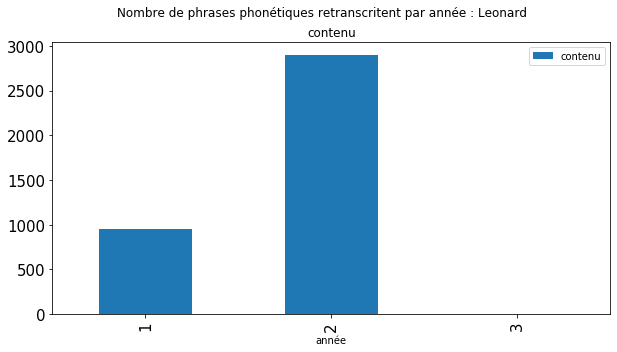

In [70]:
nb_phrase_annee.plot(kind='bar', 
                       subplots=True, 
                       figsize=(10,5),
                       title = 'Nombre de phrases phonétiques retranscritent par année : Leonard',
                       fontsize = 15,
                       use_index = True);

- Il y a un riche contenu dès la première année
- Le pic de données phonétiques se situe à l'age de 2 ans
- La quantité de données diminuent à partir de 2 ans


#### Quantité de données par mois

Regardons plus en détail la quantitée de donnée phonétique par mois :

In [72]:
nb_phrase_mois = pho_leonard[{'année','mois','contenu'}].groupby(['année','mois']).count()
nb_phrase_mois = nb_phrase_mois.rename(columns={'contenu': 'nb_phrase'})
#nb_phrase_mois.unstack(level=1)

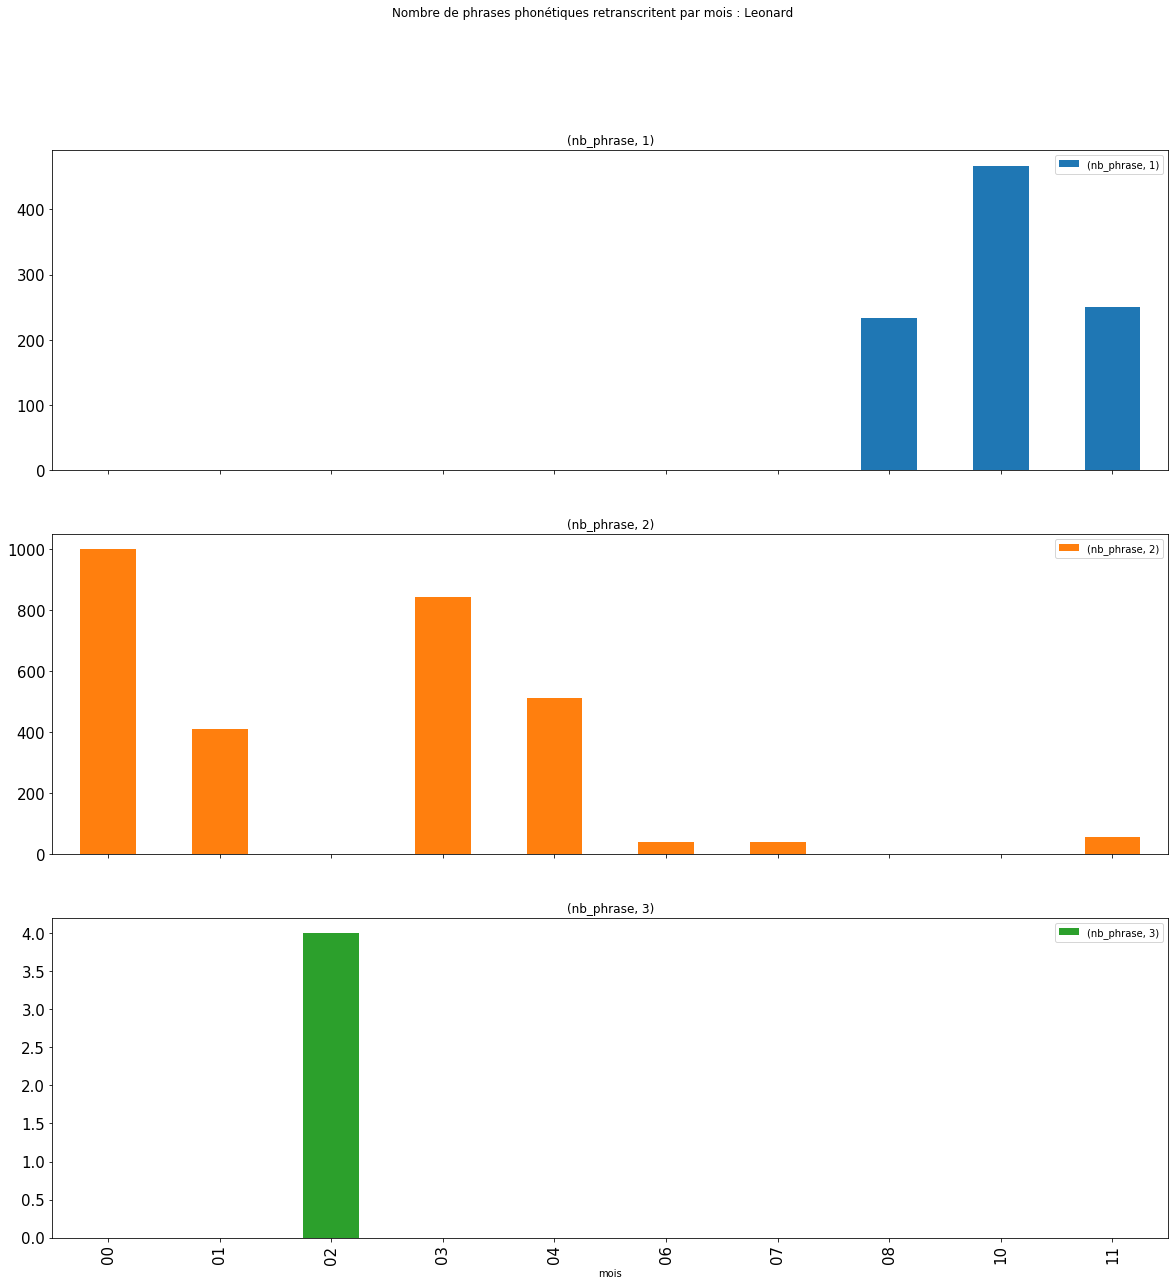

In [22]:
plt = nb_phrase_mois.unstack(level=0).plot(kind='bar', 
                                     subplots=True, 
                                     figsize=(20, 20),
                                     title = 'Nombre de phrases phonétiques retranscritent par mois : Leonard',
                                     fontsize = 15,
                                     use_index = True)

#### Quantité de données par jours

Regardons maintenant la quantité de données par jours :



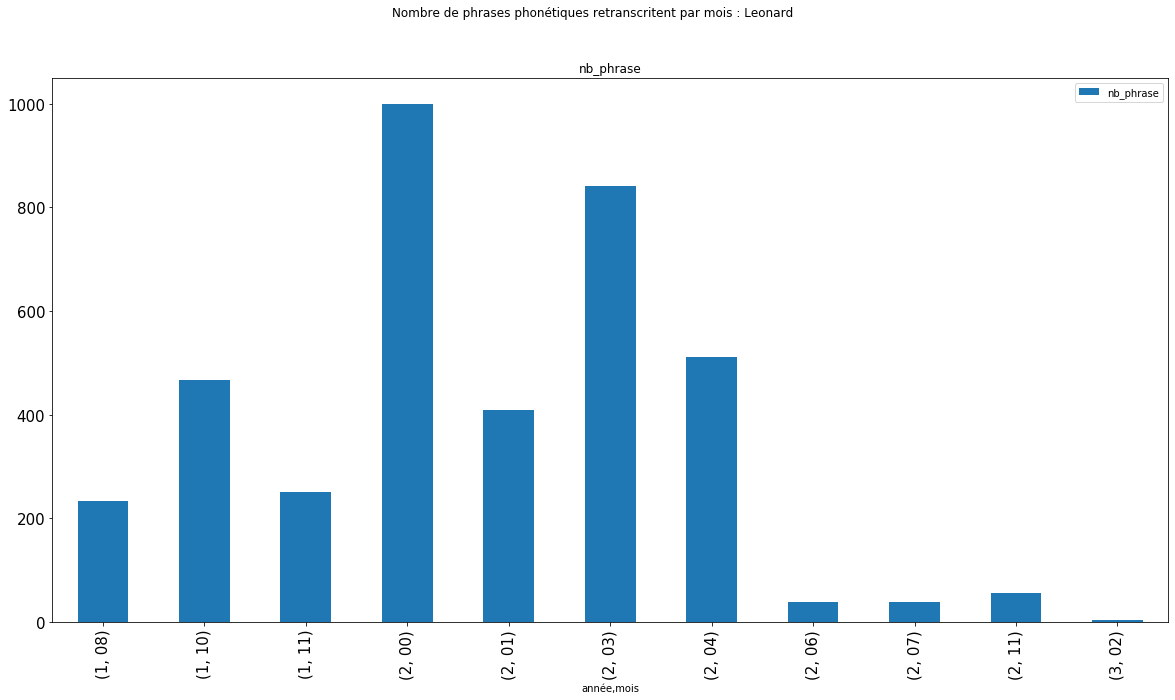

In [23]:
plt = nb_phrase_mois.plot(kind='bar',
                    subplots=True, 
                    figsize=(20, 10),
                    title = 'Nombre de phrases phonétiques retranscritent par mois : Leonard',
                    fontsize = 15,
                    use_index = True)


In [24]:
nb_phrase_jour = pho_leonard[{'année','mois', 'jour', 'contenu'}].groupby(['année','mois', 'jour']).count()
nb_phrase_jour = nb_phrase_jour.rename(columns={'contenu': 'nb_phrase'})
nb_phrase_jour

nb_phrase
année mois jour           
1     08   09          234
      10   24          467
      11   15          251
2     00   08          422
           26          577
      01   27          410
      03   00          384
           26          458
      04   25          511
      06   07           38
      07   25           39
      11   03           12
           30           44
3     02   25            4

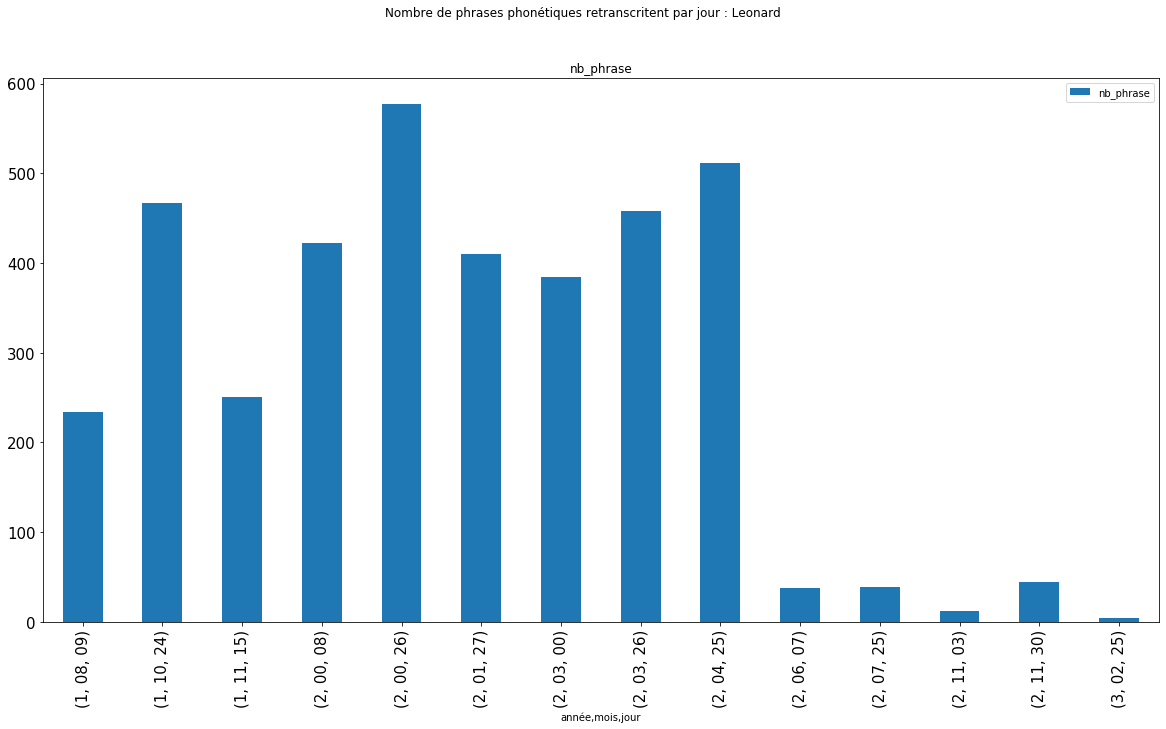

In [25]:
plt = nb_phrase_jour.plot(kind='bar',
                    subplots=True,
                    figsize=(20, 10),
                    title = 'Nombre de phrases phonétiques retranscritent par jour : Leonard',
                    fontsize = 15,
                    use_index = True)

Ici nous avons découpé les données de tel sorte à avoir la quantitée de données pour chaque enregistrement. Mais elles ne sont pas distribuées de manière équitable dans le temps. On peut mesurer la croissance du nombre de prise de parole (on pourrait croiser cette donnée avec la durée de l'enregistrement pour une meilleure mesure).


Les quantités de donnnees phonetiques pour les ages ci-dessous, sont tres faible à partir de 2_06_07.


On a maintenant une meilleure vision de la quantité de données phonétiques à disposition et de leur répartition dans le temps pour Madeleine.

### Nombre de mots

Nous allons chercher à explorer le nombre de mot au sens phonétique par phrase.

Pour cela on peut compter le nombre d'espace dans la chaîne de caractère :


Pour chaque ligne on calcul le nombre de mot phonétique :

In [44]:
# Exemple 
pho = pho_leonard.at[1000, 'contenu']
print('Nombre de mot dans "' + pho + '" : '+ str(pho.count(' ')+1))

Nombre de mot dans "a pa bebebe" : 3


In [39]:
#pho_leonard.info()

Pour chaque ligne on calcul le nombre de mot phonétique :

In [40]:
nb_mot_pho = pho_leonard.apply(lambda row: str(row['contenu']).count(' ')+1, axis=1)
pho_leonard['nombre_mot_phonétique'] = nb_mot_pho #On ajoute une colonne contenant le nombre de mot


Par exemple on peut avoir la phrase de Léonard avec le plus grand nombre de mot :

In [41]:
pho_leonard.loc[pho_leonard['nombre_mot_phonétique'] == pho_leonard['nombre_mot_phonétique'].max()].contenu.values

array(['kɑ̃ kɑ̃ lɛ ale o gʀɑ̃ o gʀɑ̃ ga o gʀɑ̃ daʀ ʃe gʀɑ̃dtmɛʀ u i avɛ lə u i avɛ lə ʃe'],
      dtype=object)

Voici la ligne de cette phrase :

In [42]:
pho_leonard.loc[pho_leonard['nombre_mot_phonétique'] == pho_leonard['nombre_mot_phonétique'].max()]

,enfant,age,type,seconde_debut,seconde_fin,contenu,année,mois,jour,nombre_mot_phonétique
23507,LEONARD,2_07_25,pho,NaN,NaN,kɑ̃ kɑ̃ lɛ ale o gʀɑ̃ o gʀɑ̃ ga o gʀɑ̃ daʀ ʃe ...,2,07,25,23


## Esperance du mot par phrase

Il est intéressant d'observer le nombre de mot moyen que contient les phrases de léonard. C'est un indicateur qui peut nous aiguiller sur l'explosion du lexicale de l'enfant. 

In [46]:
mean_nb_mot_pho_leonard_jour = pho_leonard[{'année', 'mois', 'jour', 'nombre_mot_phonétique'}].groupby(['année', 'mois', 'jour']).mean()
mean_nb_mot_pho_leonard_jour = mean_nb_mot_pho_leonard_jour.rename(columns={'nombre_mot_phonétique': 'espérance_nombre_de_mot_phonétique'})
#mean_nb_mot_pho_leonard_jour

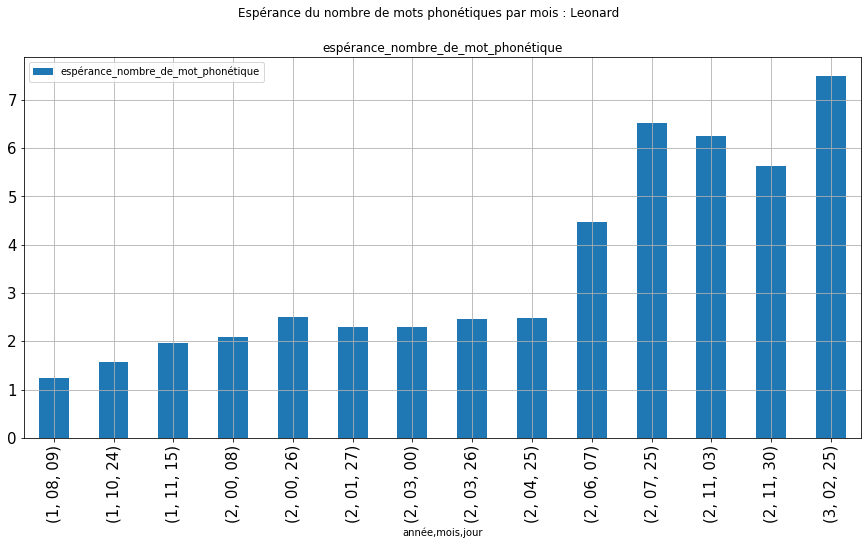

In [73]:
mean_nb_mot_pho_leonard_jour.plot(kind='bar', 
                            subplots=True, 
                            figsize=(15, 7),
                            title = 'Espérance du nombre de mots phonétiques par mois : Leonard',
                            fontsize = 15,
                            use_index = True,
                            grid=True);


On constaste que l'espérance augmente légèrement de la première année à la moitié de la deuxième année. A partir de 2 ans et 6 mois elle augmente beaucoup plus. 


## Variance du nombre de mot par phrase

Il peut être aussi intéressant d'observer la variance du nombre de mot par phrase de Léonard.

In [56]:
var_nb_mot_pho_leonard = pho_leonard[{'année','mois','jour', 'nombre_mot_phonétique'}].groupby(['année','mois','jour']).var()
var_nb_mot_pho_leonard = var_nb_mot_pho_leonard.rename(columns={'nombre_mot_phonétique': 'variance'})
#var_nb_mot_pho_leonard.unstack(level=1)

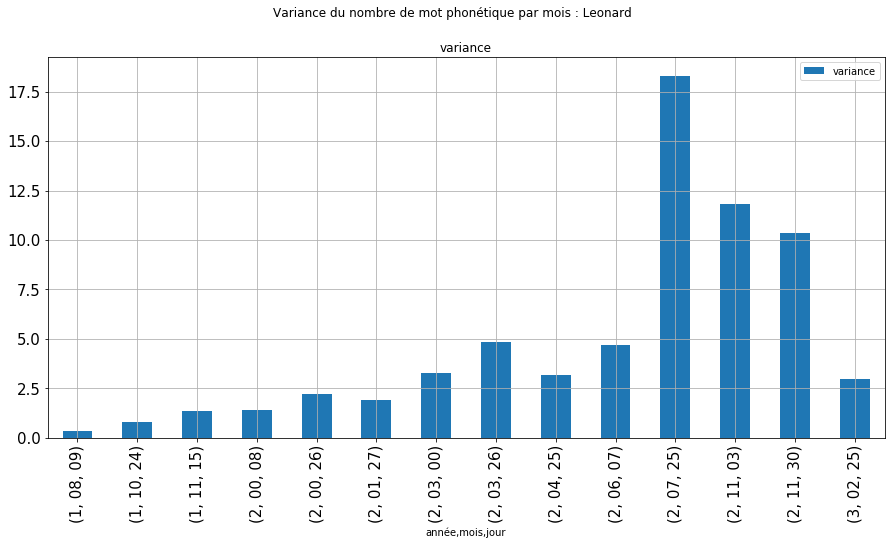

In [58]:
var_nb_mot_pho_leonard.plot(kind='bar', 
                            subplots=True, 
                            figsize=(15, 7),
                            title = 'Variance du nombre de mot phonétique par mois : Leonard',
                            fontsize = 15,
                            use_index = True,
                            grid=True);

### Plus grande phrase

In [63]:
max_mot_pho_leonard = pho_leonard[{'année','mois','jour','nombre_mot_phonétique'}].groupby(['année','mois','jour']).max()
max_mot_pho_leonard = max_mot_pho_leonard.rename(columns={'nombre_mot_phonétique': 'longueur_max'})
#max_mot_pho_leonard.unstack(level=1)

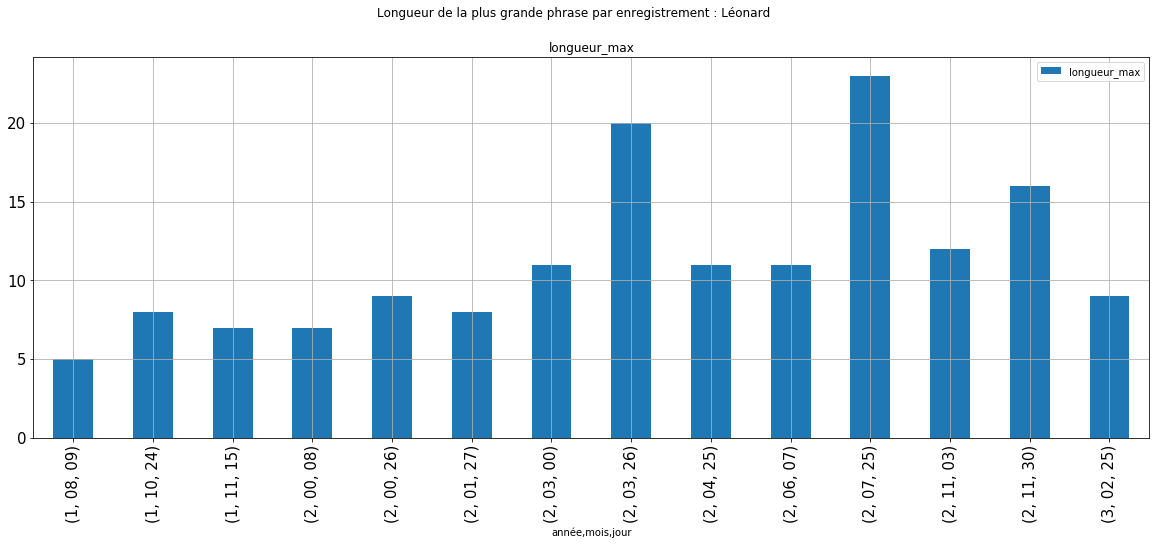

In [66]:
max_mot_pho_leonard.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 7),
                            title = 'Longueur de la plus grande phrase par enregistrement : Léonard',
                            fontsize = 15,
                            use_index = True,
                            grid=True);

On note une que la longueur de la plus longue phrase par enregistrement évolue jusqu'à ses 3 ans.

Remarque: le fait que l'enfant effectue une longue prhase signifie pas forcement que celle-ci a un sens